In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import imutils
import os

img = cv2.imread("picture1.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
#plt.imshow(gray, cmap=cm.gray)
#plt.imshow(img)

ball = cv2.imread("bola.jpg")
ball_rgb = cv2.cvtColor(ball, cv2.COLOR_BGR2RGB)
gray_ball = cv2.cvtColor(ball_rgb, cv2.COLOR_RGB2GRAY)
#plt.imshow(gray_ball, cmap=cm.gray)

In [2]:
def detect_orange(orange_hsv):
    #print(orange_bgr)
    orange_flag = False
    #orange_hsv = cv2.cvtColor(orange_bgr, cv2.COLOR_BGR2HSV)
    lower_orange = np.array([0, 40, 0])
    upper_orange = np.array([10, 250, 250])
    full_mask_orange = cv2.inRange(orange_hsv, lower_orange, upper_orange)
    result_orange = cv2.bitwise_and(orange_hsv, orange_hsv, mask=full_mask_orange)
    result_orange_3 = cv2.dilate(result_orange, None, iterations = 10)
    
    orange_rgb = cv2.cvtColor(result_orange_3, cv2.COLOR_HSV2RGB)
    orange_gray = cv2.cvtColor(orange_rgb, cv2.COLOR_BGR2GRAY)
    
    _, orange_gray_bin = cv2.threshold(orange_gray,0,255, cv2.THRESH_BINARY)
    #plt.imshow(orange_gray, cmap=cm.gray)
    #plt.show()
    non_zero = np.count_nonzero(orange_gray_bin == 255)
    zero = np.count_nonzero(orange_gray_bin == 0)
    percentage = (non_zero/(zero+non_zero))*100
    if percentage> 70.0:
        orange_flag = True
    return orange_flag

def detect_white(white_hsv):

    white_flag = False
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([360, 40, 300])
    full_mask_white = cv2.inRange(white_hsv, lower_white, upper_white)
    result_white = cv2.bitwise_and(white_hsv, white_hsv, mask=full_mask_white)
    result_white_2 = cv2.dilate(result_white, None, iterations = 10)
    
    white_rgb = cv2.cvtColor(result_white_2, cv2.COLOR_HSV2RGB)
    white_gray = cv2.cvtColor(white_rgb, cv2.COLOR_BGR2GRAY)
    
    _, white_gray_bin = cv2.threshold(white_gray,0,255, cv2.THRESH_BINARY)
    #plt.imshow(white_gray_bin, cmap=cm.gray)
    #plt.show()
    non_zero = np.count_nonzero(white_gray_bin == 255)
    zero = np.count_nonzero(white_gray_bin == 0)
    percentage = (non_zero/(zero+non_zero))*100
    if percentage> 70.0:
        white_flag = True
    return white_flag

In [3]:
#### hough transform

edges = cv2.Canny(gray, 200, 700, apertureSize = 5,L2gradient = True)
#plt.imshow(edges)

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 100,
                               param1=100, param2=20,
                               minRadius=30, maxRadius=50)

copy_img = img_rgb.copy()
copy_img_2 = img_rgb.copy()
copy_img_3 = img_rgb.copy()
img_bgr = img.copy()
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
#plt.imshow(img_bgr)


29821872.0
8848767.0
6908336.0
9211232.0
10125728.0
39897664.0
51157224.0
92147512.0
2456950.0
12393910.0
12244176.0


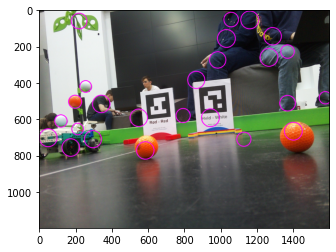

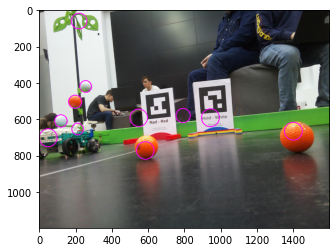

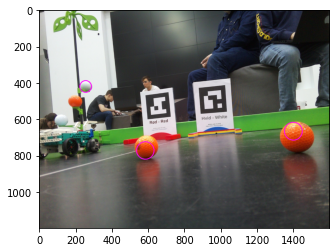

In [4]:
# Applying Color filter & Template Matching
values = []
new_circles = []
minimum = 9999999
if circles is not None:
    circles = np.uint16(np.around(circles))
    #print(circles)
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]

        ymin = i[1] - radius
        ymax = i[1] + radius
        xmin = i[0] - radius
        xmax = i[0] + radius
        crop_img = img_hsv[ymin:ymax, xmin:xmax]
        cv2.circle(copy_img_2, center, radius, (255, 0, 255), 3)
        orange_color_tester = detect_orange(crop_img)
        white_color_tester = detect_white(crop_img)
        
        if orange_color_tester or white_color_tester:
            cv2.circle(copy_img, center, radius, (255, 0, 255), 3)
            crop_img_2 = img_rgb[ymin:ymax, xmin:xmax]
            crop_img_gray = cv2.cvtColor(crop_img_2, cv2.COLOR_RGB2GRAY)

            res = cv2.matchTemplate(crop_img_gray, gray_ball, cv2.TM_SQDIFF)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            print(min_val)

            if min_val < minimum:
                cv2.circle(copy_img_3, center, radius, (255, 0, 255), 3)
                
                minimum = min_val
                values.append(min_val)
                new_circles.append(list(i))
            
        
#print(new_circles) 
#print(values)
plt.imshow(copy_img_2)
plt.show()
plt.imshow(copy_img)
plt.show()
plt.imshow(copy_img_3)
plt.show()